In [1]:
from fastai.imports import *
from pathlib import Path
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import graphviz

sns_palette = sns.color_palette("muted")

In [2]:
!pip install fastai


In [3]:
!pip install graphviz


In [4]:
%%html
<style>
table {float:left}
</style>

In [5]:
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle:
    path = Path('../input/credit-card-details')
    !pip install -Uqq fastai
else:
    path = Path('./cc_approval')

# credit card csv doesn't have label column, the rows line up so just
# add labels to the df
df = pd.read_csv(path/'/Users/sukeshmunaga/Downloads/archive/Credit_card.csv')
labels = pd.read_csv(path/'/Users/sukeshmunaga/Downloads/archive/Credit_card_label.csv')

dep = 'Approved'

df[dep] = labels.label.astype(int)

df.loc[df[dep] == 1, 'Status'] = 'Approved'
df.loc[df[dep] == 0, 'Status'] = 'Declined'

In [6]:
print('Total records:', len(df))

Total records: 1548


In [7]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Approved,Status
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1,Approved
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,Approved
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1,Approved
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,Approved
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,Approved


In [8]:
df.drop('Ind_ID', axis=1).describe()

,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Approved
count,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [9]:
print('Modes')
print('----------------------')
df.drop('Ind_ID', axis=1).mode().iloc[0]

Modes
----------------------


GENDER                                         F
Car_Owner                                      N
Propert_Owner                                  Y
CHILDREN                                     0.0
Annual_income                           135000.0
Type_Income                              Working
EDUCATION          Secondary / secondary special
Marital_status                           Married
Housing_type                   House / apartment
Birthday_count                          -22655.0
Employed_days                           365243.0
Mobile_phone                                 1.0
Work_Phone                                   0.0
Phone                                        0.0
EMAIL_ID                                     0.0
Type_Occupation                         Laborers
Family_Members                               2.0
Approved                                     0.0
Status                                  Declined
Name: 0, dtype: object

In [10]:
df.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
Approved             0
Status               0
dtype: int64

In [11]:
approved = df[df[dep] == 1]
declined = df[df[dep] == 0]

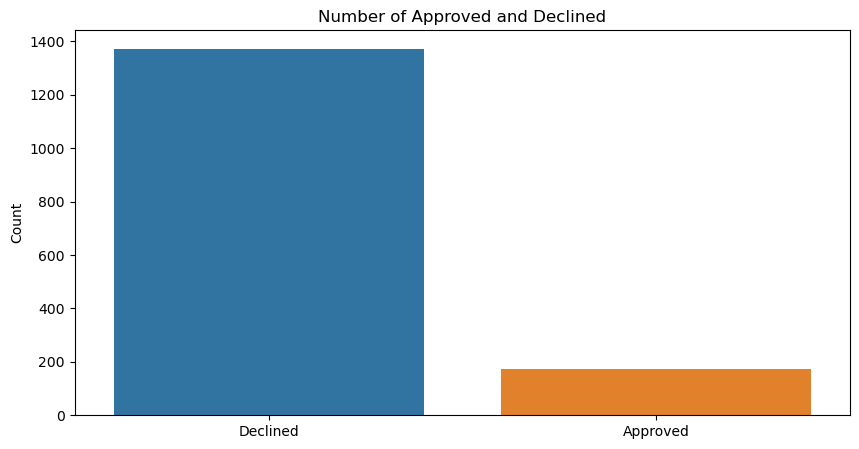

In [12]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df['Status'].value_counts().index, y=df['Approved'].value_counts().values)
plt.title('Number of Approved and Declined')
plt.ylabel('Count');

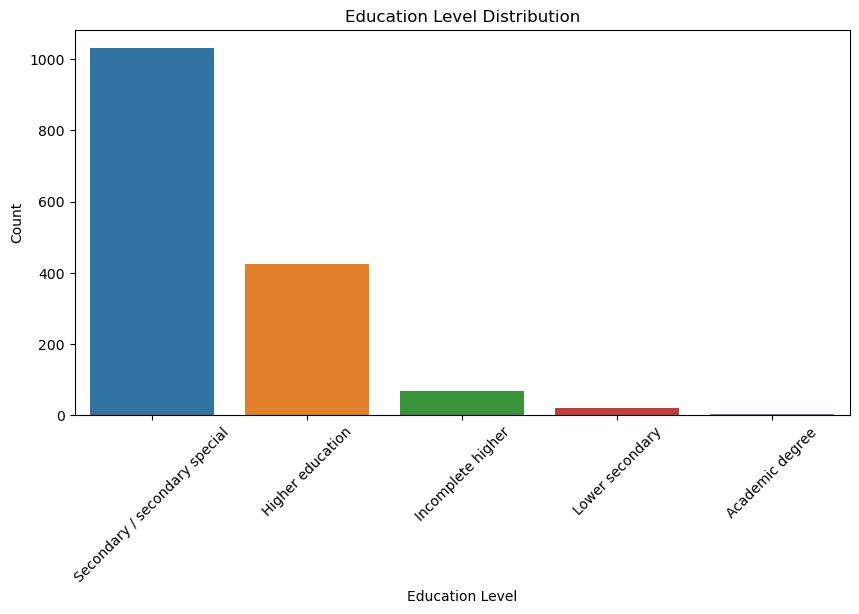

In [13]:
plt.figure(figsize=(10, 5))

eds = df.EDUCATION.value_counts().index
sns.barplot(x=eds, y=df.EDUCATION.value_counts().values)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show();


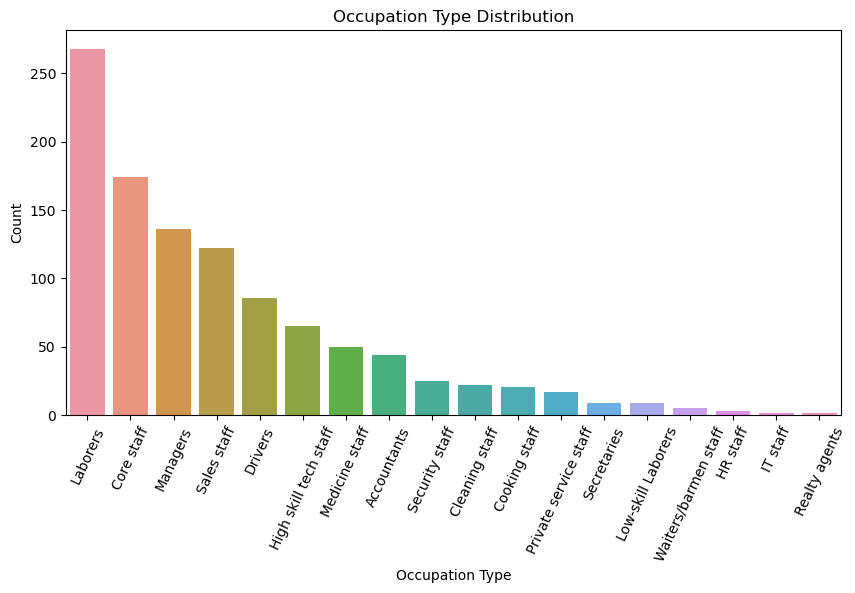

In [14]:
plt.figure(figsize=(10, 5))

occ_types = df.Type_Occupation.value_counts().index
sns.barplot(x=occ_types, y=df.Type_Occupation.value_counts().values)
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Occupation Type Distribution')
plt.xticks(rotation=65)
plt.show();

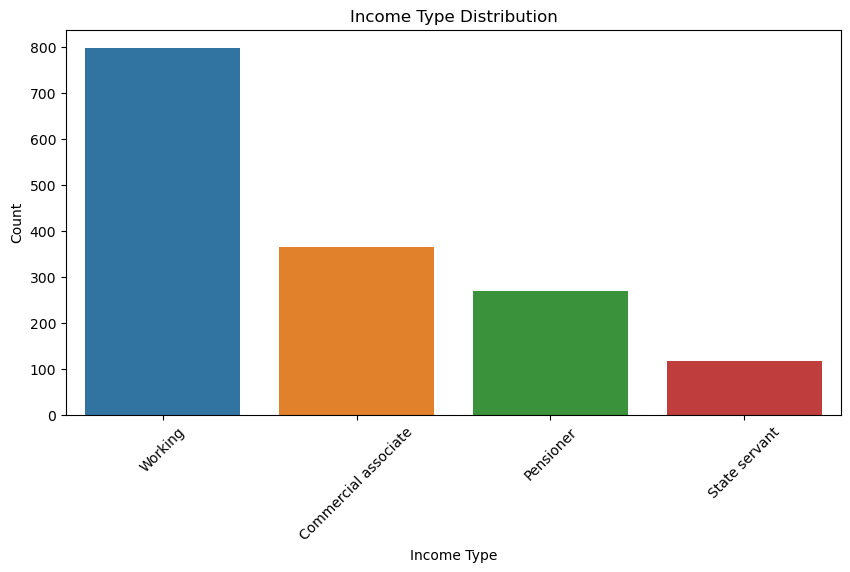

In [15]:
plt.figure(figsize=(10, 5))

occ_types = df.Type_Income.value_counts().index
sns.barplot(x=occ_types, y=df.Type_Income.value_counts().values)
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.title('Income Type Distribution')
plt.xticks(rotation=45)
plt.show()

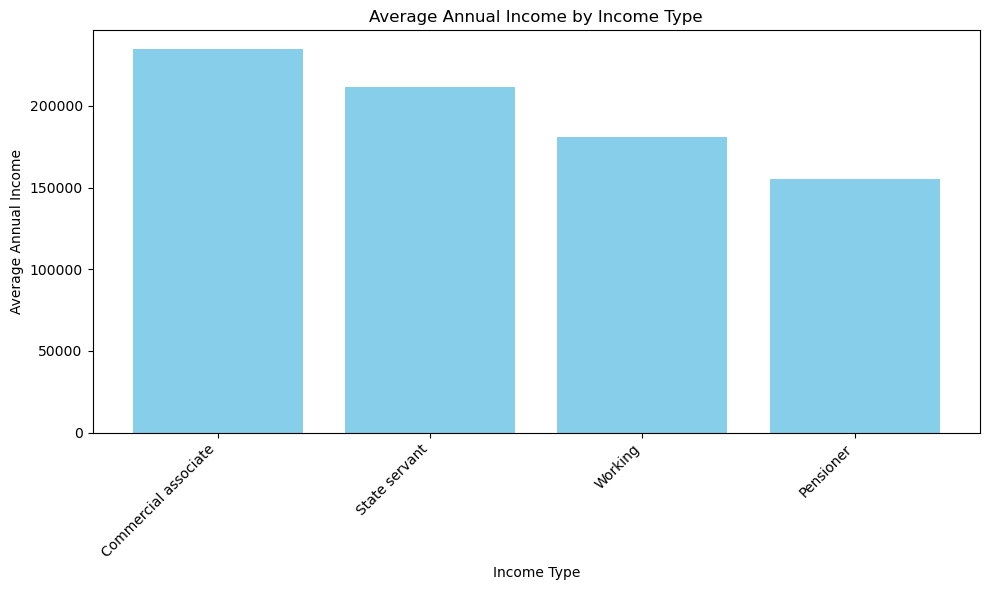

In [16]:
# Calculate the average income by income type
average_income = df.groupby('Type_Income')['Annual_income'].mean().reset_index()

# Sort the data for better visualization, if needed
average_income = average_income.sort_values('Annual_income', ascending=False)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(average_income['Type_Income'], average_income['Annual_income'], color='skyblue')
plt.xlabel('Income Type')
plt.ylabel('Average Annual Income')
plt.title('Average Annual Income by Income Type')
plt.xticks(rotation=45, ha="right")  # Rotate the x labels for better readability
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap
plt.show()

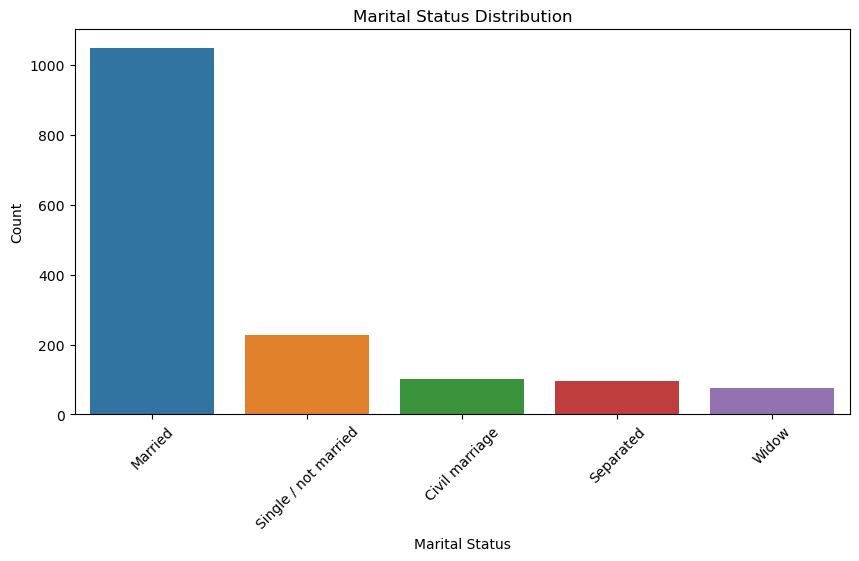

In [17]:
plt.figure(figsize=(10, 5))

marital_types = df.Marital_status.value_counts().index
sns.barplot(x=marital_types, y=df.Marital_status.value_counts().values)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')
plt.xticks(rotation=45)
plt.show()

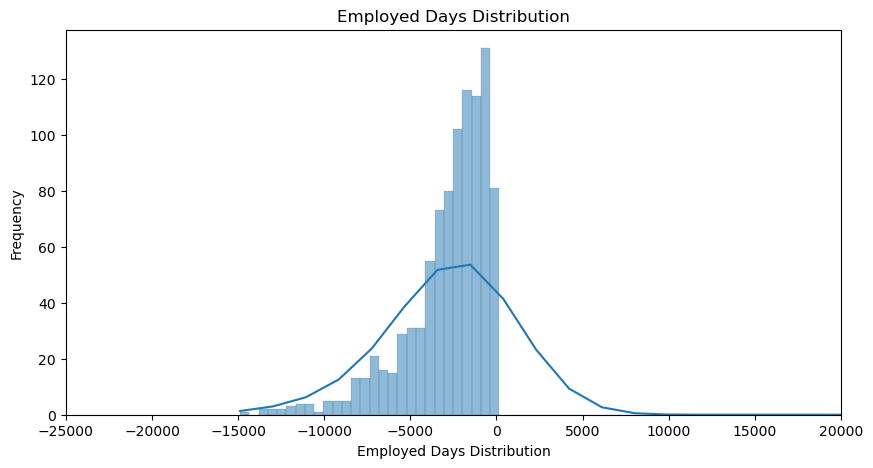

In [18]:
plt.figure(figsize=(10, 5))

emp_days = df.Employed_days.value_counts().index
sns.histplot(x=emp_days, kde=True)
plt.xlabel('Employed Days Distribution')
plt.ylabel('Frequency')
plt.title('Employed Days Distribution')
plt.xlim(-25000, 20000);

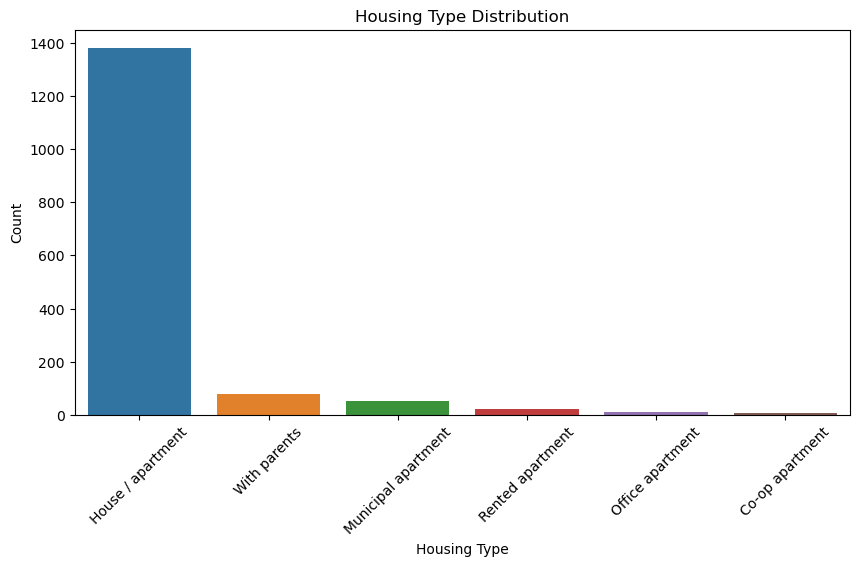

In [19]:
plt.figure(figsize=(10, 5))

housing_types = df.Housing_type.value_counts().index
sns.barplot(x=housing_types, y=df.Housing_type.value_counts().values)
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.title('Housing Type Distribution')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Group by Car_Owner and Propert_Owner
grouped_data = df.groupby(['Car_Owner', 'Propert_Owner'])

# Function to calculate approval percentage
def approval_rate(group):
    # Count the number of approvals (assuming 0 indicates approval)
    approvals = group['Approved'].value_counts().get(0, 1)
    # Calculate total applications
    total_applications = len(group)
    # Calculate approval rate
    return (approvals / total_applications) * 100

# Apply the function to each group to get the approval rates
approval_rates = grouped_data.apply(approval_rate).reset_index(name='Approval_Percentage')

print(approval_rates)

  Car_Owner Propert_Owner  Approval_Percentage
0         N             N            88.509317
1         N             Y            88.205980
2         Y             N            87.037037
3         Y             Y            90.441176


In [21]:
import pandas as pd
from datetime import datetime, timedelta


# Convert 'Birthday_count' from days to age in years
df['Age'] = df['Birthday_count'].apply(lambda x: abs(x) // 365)

# Define age groups
bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate approval rates for each age group
approval_rates_age_groups = df.groupby('Age_Group')['Approved'].mean()

# Display the approval rates
print(approval_rates_age_groups)


Age_Group
0-18           NaN
19-30     0.100478
31-40     0.105140
41-50     0.105128
51-60     0.133929
61-70     0.128834
71-80          NaN
81-90          NaN
91-100         NaN
Name: Approved, dtype: float64


In [22]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the credit card application data
# 'label' column indicates whether the application was approved (0) or rejected (1)
# 'Education' column indicates the education level of applicants

# Calculate approval rates based on education level
approvals_counts = df.groupby('Marital_status')['Approved'].apply(lambda x: (x == 1).sum())
totals_counts = df['Marital_status'].value_counts()
approvals_rates = approvals_counts / totals_counts * 100

# Print credit card approval rates based on education level
print("Credit Card Approval Rates based on Education Level:")
print(approvals_rates)

Credit Card Approval Rates based on Education Level:
Civil marriage           3.960396
Married                 10.867493
Separated               14.583333
Single / not married    15.418502
Widow                   10.666667
dtype: float64


In [23]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the credit card application data
# 'label' column indicates whether the application was approved (1) or rejected (0)
# 'Annual_income' column indicates the annual income of individuals

# Calculate average income for people with approved credit card applications
avg_income_approved = df[df['Approved'] == 1]['Annual_income'].mean()

# Calculate average income for people without approved credit card applications
avg_income_rejected = df[df['Approved'] == 0]['Annual_income'].mean()

# Print average incomes
print("Average Income of People with Approved Credit Card Applications:", avg_income_approved)
print("Average Income of People without Approved Credit Card Applications:", avg_income_rejected)

Average Income of People with Approved Credit Card Applications: 200263.4730538922
Average Income of People without Approved Credit Card Applications: 190309.25810014727


In [24]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the credit card application data
# 'label' column indicates whether the application was approved (0) or rejected (1)
# 'Education' column indicates the education level of applicants

# Calculate approval rates based on education level
approvals_counts = df.groupby('Type_Occupation')['Approved'].apply(lambda x: (x == 1).sum())
totals_counts = df['Type_Occupation'].value_counts()
approvals_rates = approvals_counts / totals_counts * 100

# Print credit card approval rates based on education level

print(approvals_rates)

Accountants               11.363636
Cleaning staff             9.090909
Cooking staff             19.047619
Core staff                13.218391
Drivers                   10.465116
HR staff                   0.000000
High skill tech staff     10.769231
IT staff                 100.000000
Laborers                  10.447761
Low-skill Laborers        22.222222
Managers                  10.294118
Medicine staff             6.000000
Private service staff      0.000000
Realty agents              0.000000
Sales staff                8.196721
Secretaries                0.000000
Security staff            32.000000
Waiters/barmen staff      20.000000
dtype: float64


In [25]:
cats = [
    'GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income',
    'EDUCATION', 'Marital_status', 'Housing_type', 'Mobile_phone',
    'Work_Phone', 'Phone', 'Type_Occupation', 'EMAIL_ID'
]

conts = [
    'CHILDREN', 'Family_Members', 'Annual_income',
    'Age', 'EmployedDaysOnly', 'UnemployedDaysOnly'
]

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
def proc_data():
    df['Age'] = -df.Birthday_count // 365
    df['EmployedDaysOnly'] = df.Employed_days.apply(lambda x: x if x > 0 else 0)
    df['UnemployedDaysOnly'] = df.Employed_days.apply(lambda x: abs(x) if x < 0 else 0)
    df['Annual_income'] = scaler.fit_transform(df[['Annual_income']])

    for cat in cats:
        df[cat] = pd.Categorical(df[cat])

    modes = df.mode().iloc[0]
    df.fillna(modes, inplace=True)

proc_data()

/var/folders/8k/rcqq4pcd47j0492qcz2lqs1c0000gn/T/ipykernel_28876/2622872790.py:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.fillna(modes, inplace=True)


In [27]:
X, y = df[cats + conts].copy(), df[dep]

X_over, y_over = RandomOverSampler().fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_over, y_over, test_size=0.25)

X_train[cats] = X_train[cats].apply(lambda x: x.cat.codes)
X_val[cats] = X_val[cats].apply(lambda x: x.cat.codes)

In [28]:
rf = RandomForestClassifier(100, oob_score=True)
rf.fit(X_train, y_train);

In [29]:
preds = rf.predict(X_val)
mse = mean_absolute_error(preds, y_val)
oob_error = 1 - rf.oob_score_
acc = accuracy_score(y_val, preds)
f1 = f1_score(y_val, preds)

print('MSE: ', mse)
print('OOB: ', oob_error)
print('Accuracy: ', acc)
print('F1 Score: ', f1)

MSE:  0.00727802037845706
OOB:  0.012141816415735751
Accuracy:  0.992721979621543
F1 Score:  0.9928057553956835


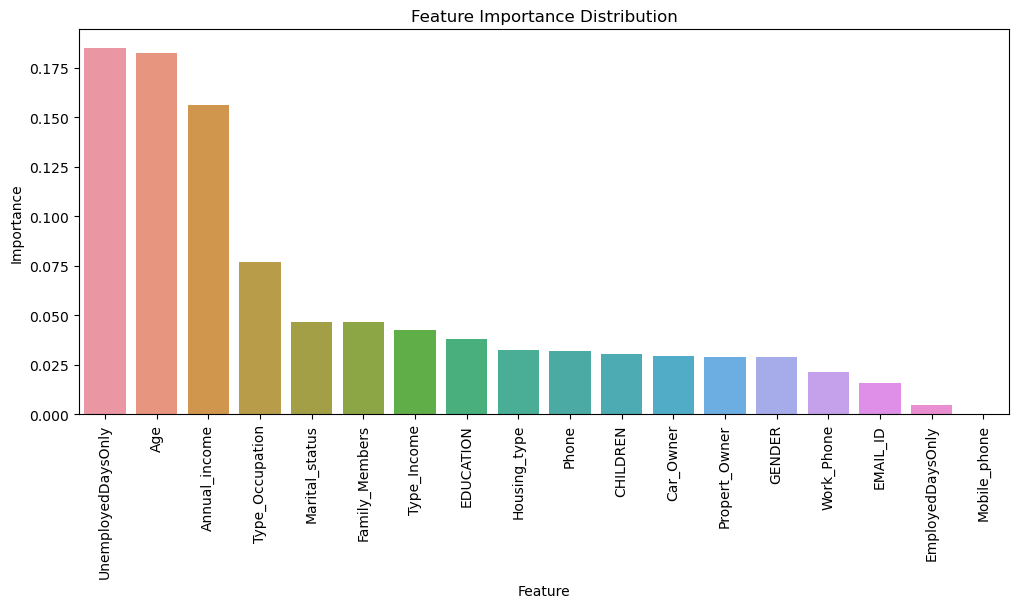

In [30]:
feature_imps = rf.feature_importances_

sorted_indexes = feature_imps.argsort()[::-1]

cols = X_train.columns[sorted_indexes]

plt.figure(figsize=(12, 5))

sns.barplot(x=cols, y=feature_imps[sorted_indexes])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Distribution')
plt.xticks(rotation=90)
plt.show();

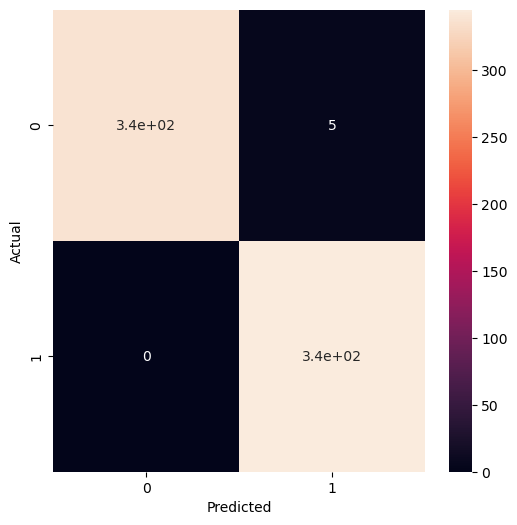

In [31]:
confusion = confusion_matrix(y_val, preds)
plt.figure(figsize=(6,6))
sns.heatmap(confusion, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual");

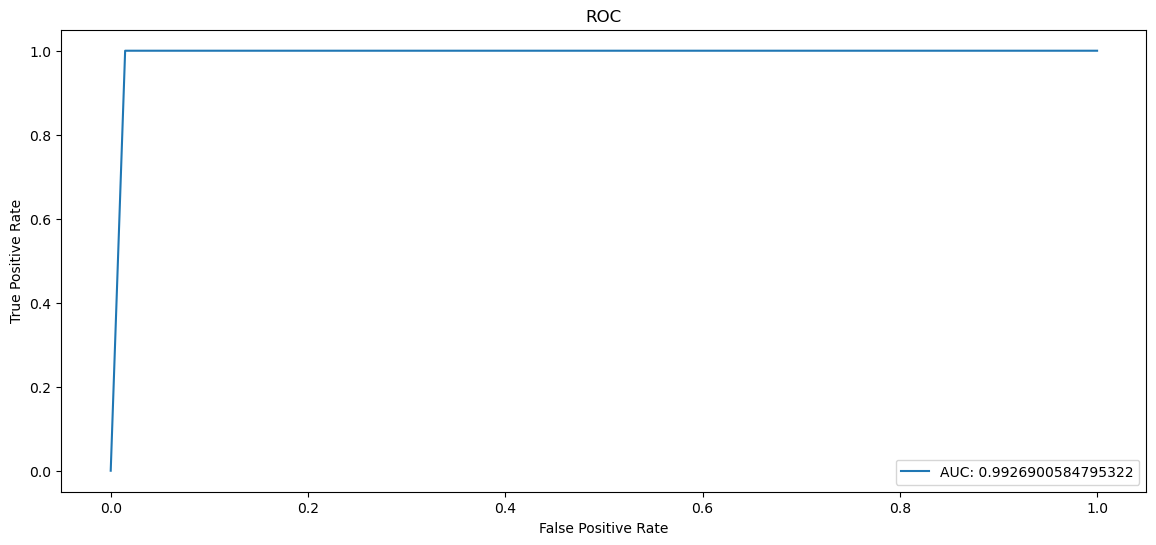

In [32]:
plt.figure(figsize=(14, 6))

fpr, tpr, thresh = roc_curve(y_val, preds)
auc = roc_auc_score(y_val, preds)
plt.plot(fpr, tpr, label="AUC: "+str(auc))

plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=0);

In [33]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

# Fit the model with the training data
logistic_model.fit(X_train, y_train)

# Predictions
y_pred = logistic_model.predict(X_val)

# Evaluation
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)
print("f_1 score:", f1)

Accuracy: 0.5836972343522562
Confusion Matrix:
 [[143 199]
 [ 87 258]]
ROC AUC Score: 0.582977370963641
f_1 score: 0.6433915211970075


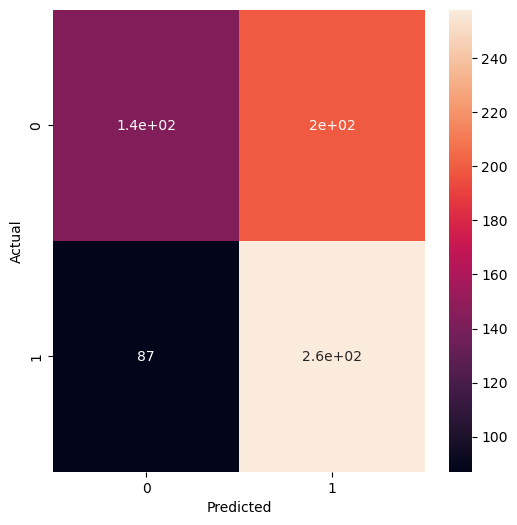

In [34]:
confusion = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(confusion, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual");

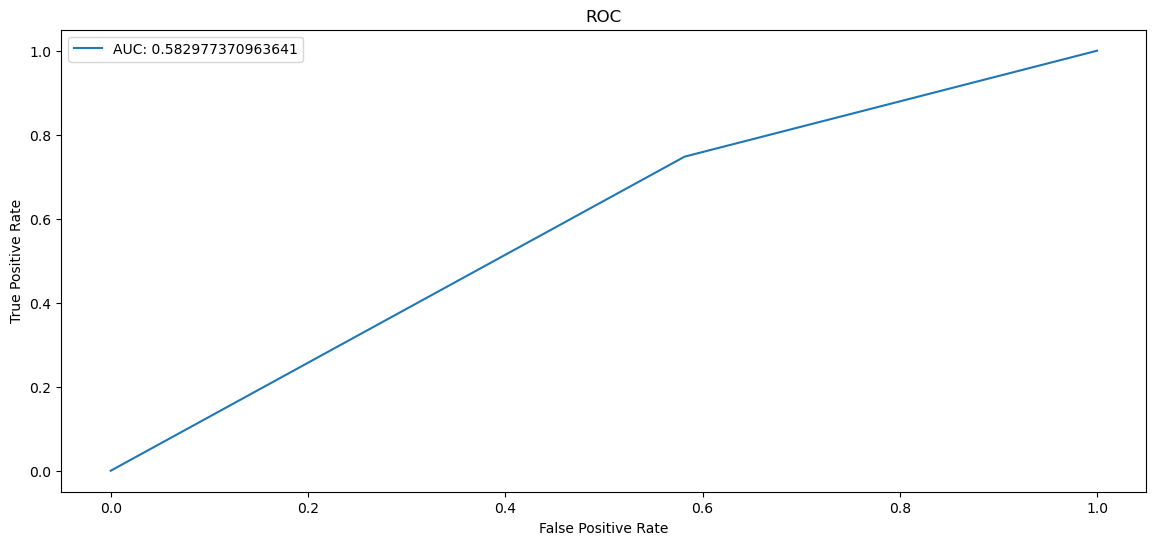

In [35]:
plt.figure(figsize=(14, 6))

fpr, tpr, thresh = roc_curve(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred)
plt.plot(fpr, tpr, label="AUC: "+str(auc))

plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=0);

In [36]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fitting the model with the training data
decision_tree_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = decision_tree_model.predict(X_val)

# Evaluating the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)
print("f_1 score:", f1)

Accuracy: 0.9548762736535662
Confusion Matrix:
 [[311  31]
 [  0 345]]
ROC AUC Score: 0.9546783625730993
f_1 score: 0.957004160887656


In [49]:
param_grid = {
    "criterion" : ["gini", "entropy"],
    "splitter" : ["best", "random"],
    "max_depth" : [None, 10, 20, 30, 40, 50],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}
grid_search_tree = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = param_grid)

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score: 0.9583333333333334


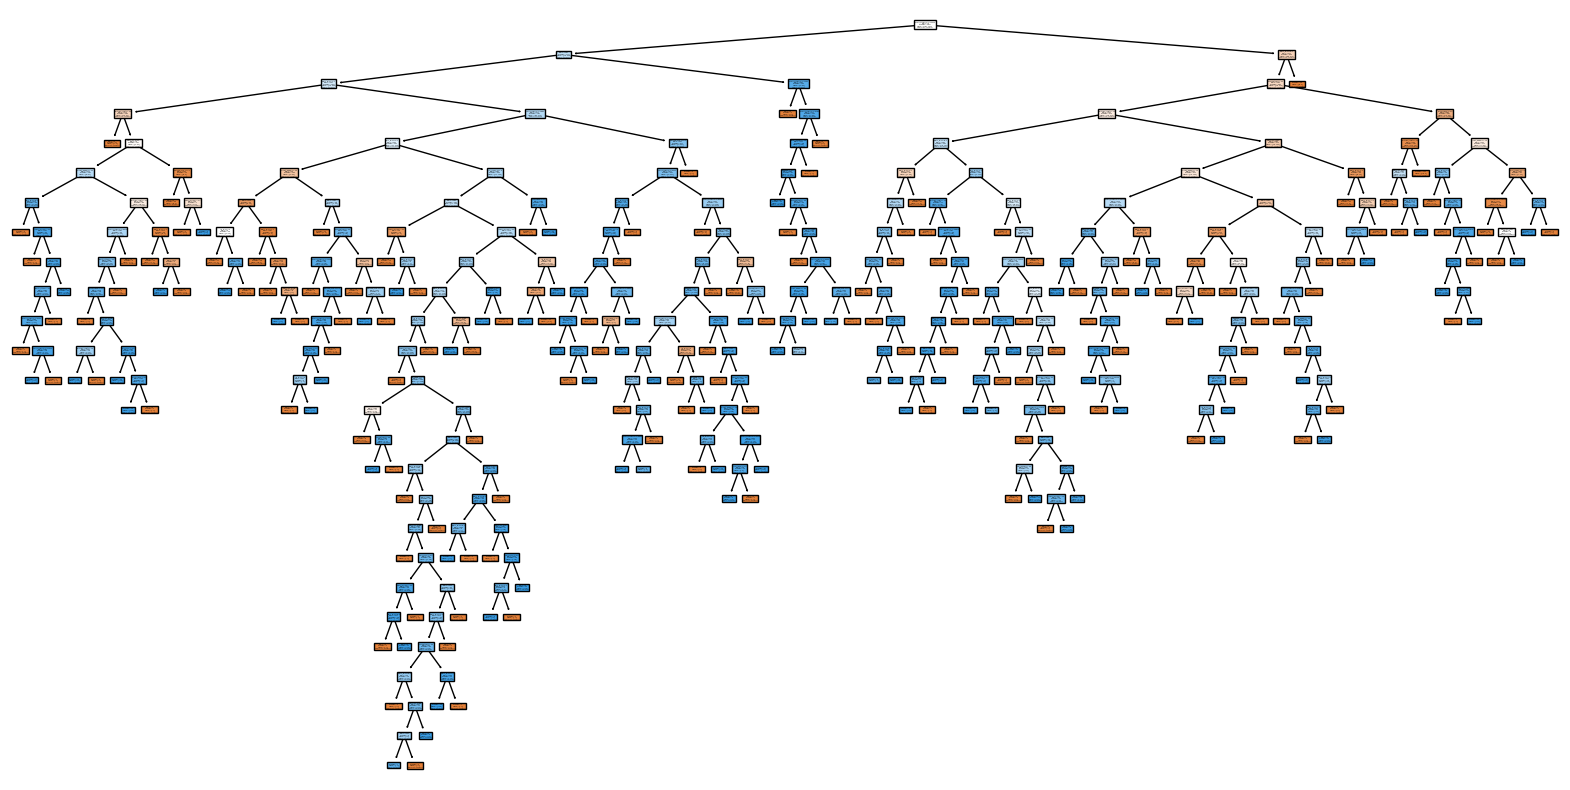

In [56]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming X_train and y_train are your training features and labels
# Train the decision tree model
decision_tree = DecisionTreeClassifier(criterion='entropy', splitter='random', min_samples_split=2, min_samples_leaf=4)
decision_tree.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20,10))
feature_names = df.columns.tolist()  # replace 'df' with the name of your original DataFrame
plot_tree(decision_tree_model, filled=True, feature_names=feature_names, class_names=['Not Approved', 'Approved'])
plt.show()


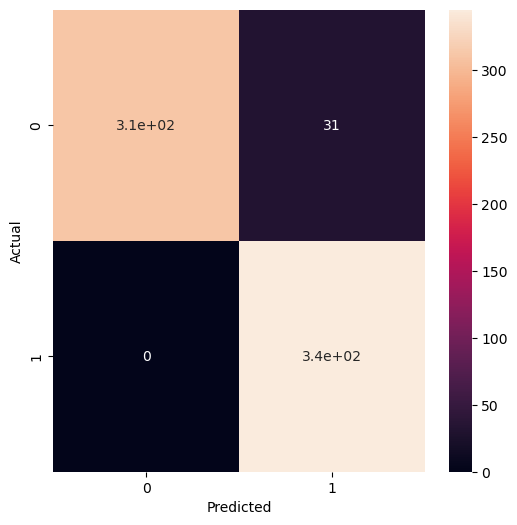

In [37]:
confusion = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(confusion, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual");

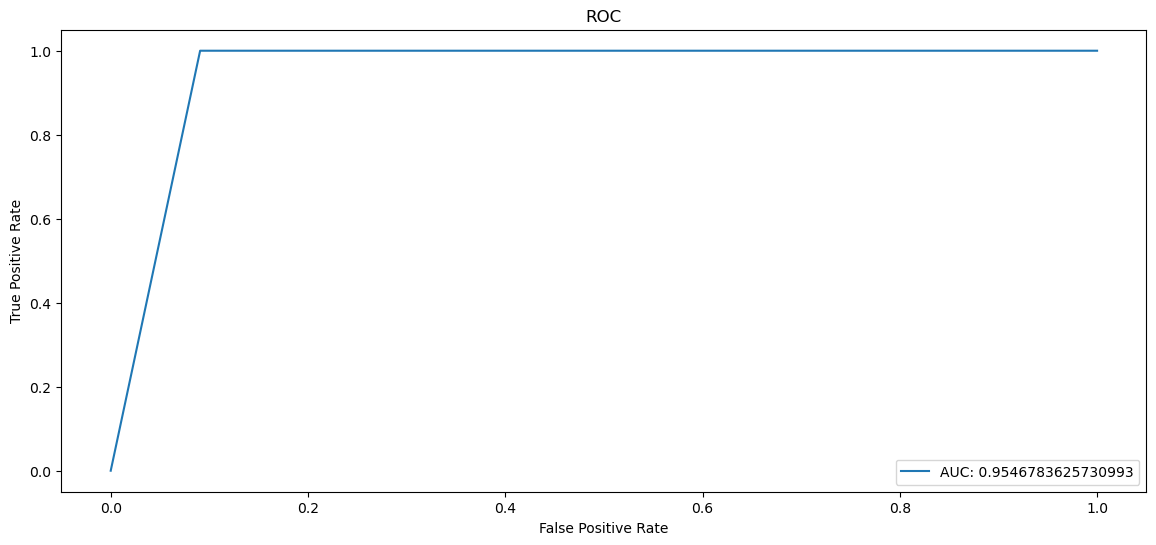

In [38]:
plt.figure(figsize=(14, 6))

fpr, tpr, thresh = roc_curve(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred)
plt.plot(fpr, tpr, label="AUC: "+str(auc))

plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=0);

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust n_neighbors based on your dataset

# Fitting the model with the training data
knn_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = knn_model.predict(X_val)

# Evaluating the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
# For ROC AUC Score, we need probability estimates of the positive class, not just predictions
roc_auc = roc_auc_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)
print("f_1 score:", f1)

Accuracy: 0.9068413391557496
Confusion Matrix:
 [[280  62]
 [  2 343]]
ROC AUC Score: 0.9064581744215611
f_1 score: 0.9146666666666666


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


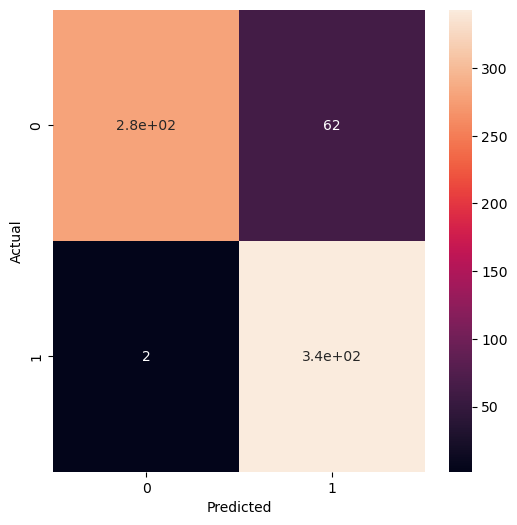

In [40]:
confusion = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(confusion, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual");

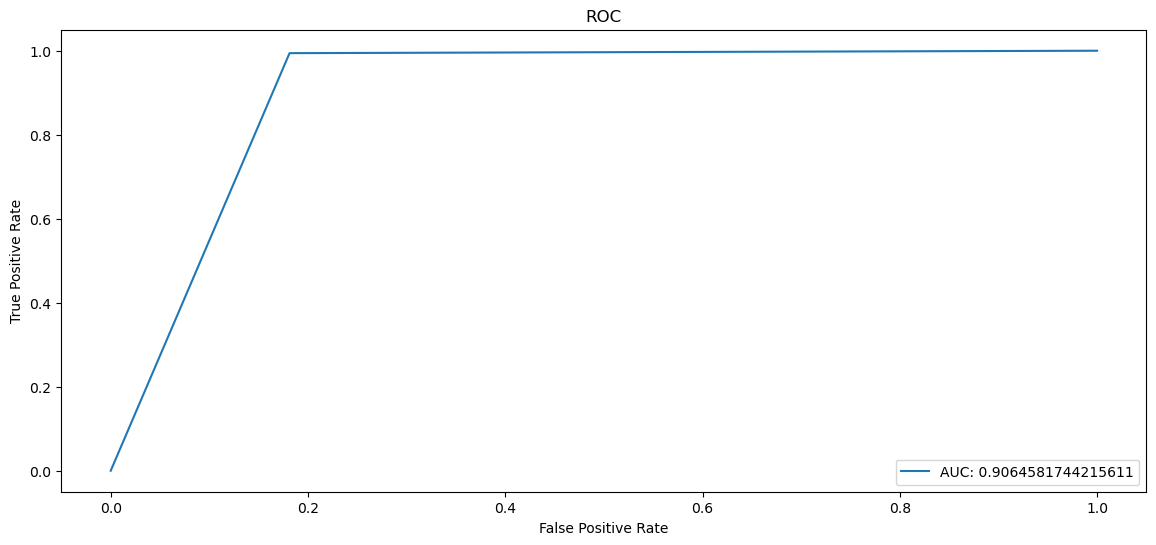

In [41]:
plt.figure(figsize=(14, 6))

fpr, tpr, thresh = roc_curve(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred)
plt.plot(fpr, tpr, label="AUC: "+str(auc))

plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=0);

In [42]:
from sklearn.svm import SVC
svm_model = SVC(probability=True, kernel='rbf', random_state=42)

# Fitting the model with the training data
svm_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = svm_model.predict(X_val)

# Evaluating the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)
print("f_1 score:", f1)

Accuracy: 0.5327510917030568
Confusion Matrix:
 [[281  61]
 [260  85]]
ROC AUC Score: 0.5340071192473939
f_1 score: 0.3462321792260693


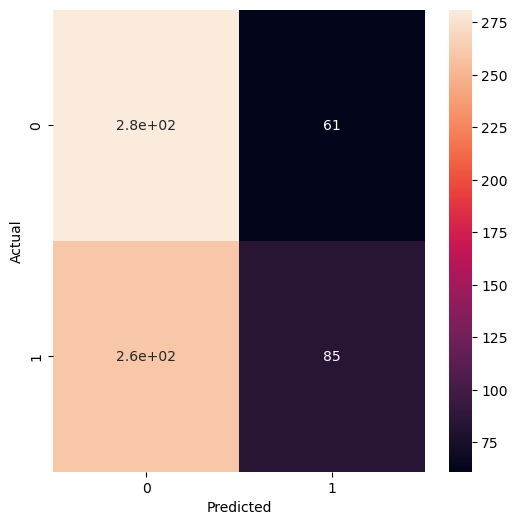

In [43]:
confusion = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(confusion, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual");

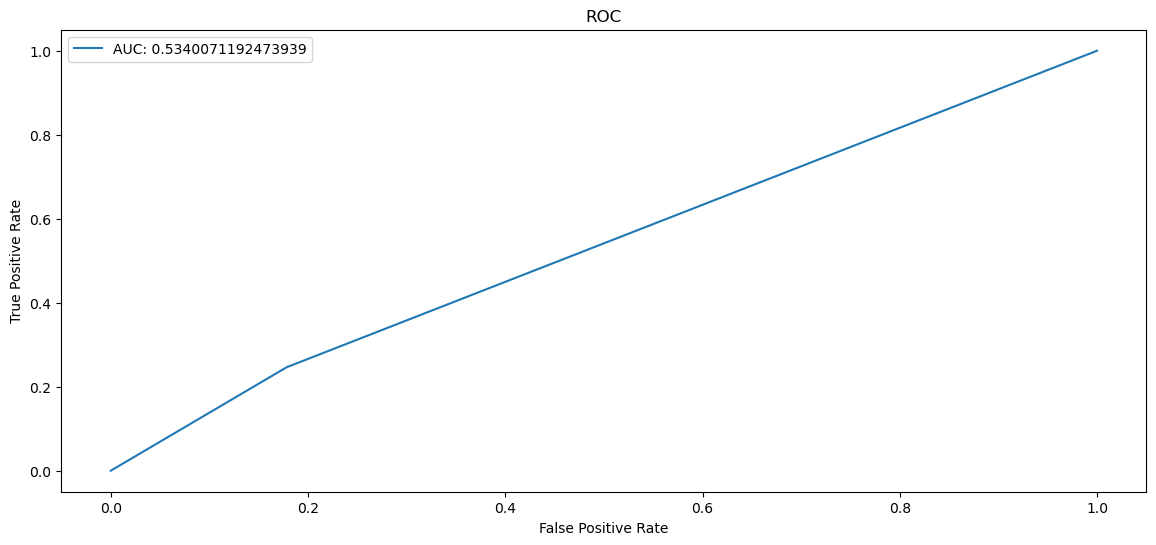

In [44]:
plt.figure(figsize=(14, 6))

fpr, tpr, thresh = roc_curve(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred)
plt.plot(fpr, tpr, label="AUC: "+str(auc))

plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=0);

In [45]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=200, random_state=42)

# Fitting the model with the training data
ada_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = ada_model.predict(X_val)

# Evaluating the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)
print("f_1 score:", f1)

Accuracy: 0.7685589519650655
Confusion Matrix:
 [[248  94]
 [ 65 280]]
ROC AUC Score: 0.76837020086448
f_1 score: 0.7788595271210015


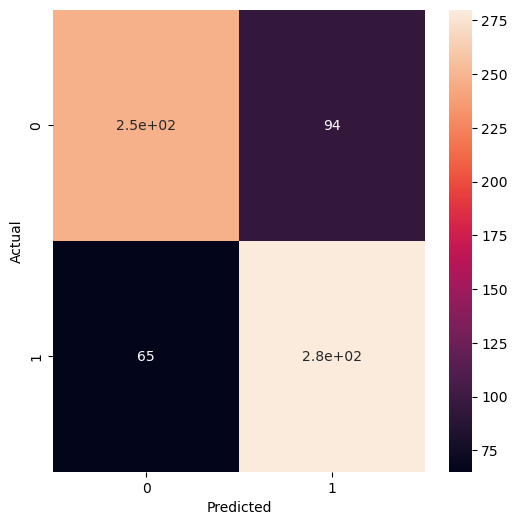

In [46]:
confusion = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(confusion, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual");

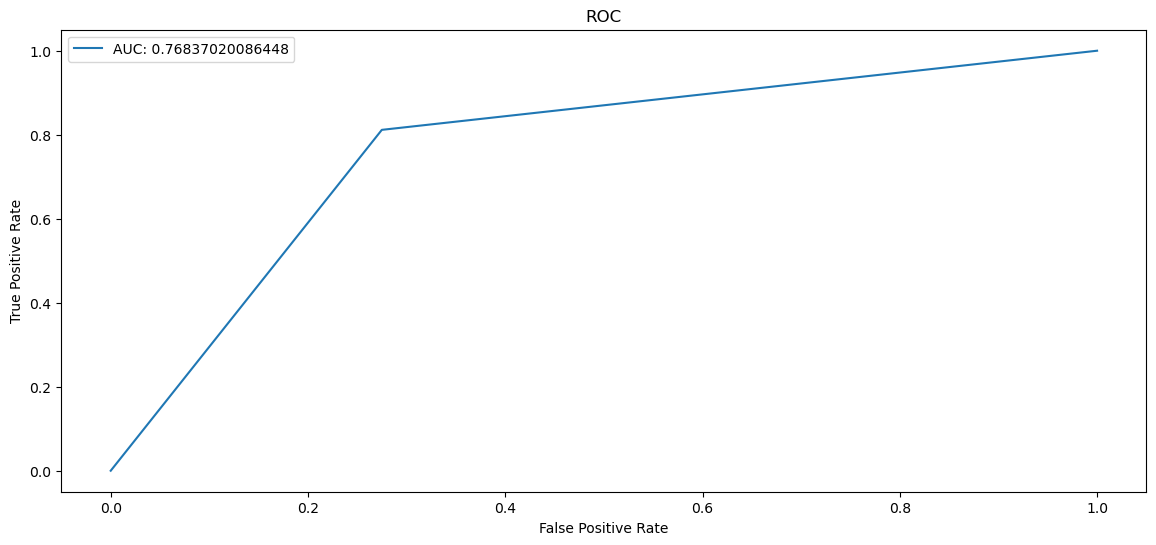

In [47]:
plt.figure(figsize=(14, 6))

fpr, tpr, thresh = roc_curve(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred)
plt.plot(fpr, tpr, label="AUC: "+str(auc))

plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=0);